# Analyse du facteur de charge éolien à Toulouse entre 1980 et 2022

### Chargement des packages et choix des options

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

C:\Users\Manon Julia\AppData\Local\Temp\ipykernel_101604\4123840345.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Choix des options

#Lien pour les données
#data_path=""
data_path="Données/"

## Mise en forme des données

On a des téléchargé les données de facteur de charge à Toulouse pour un certain modèle d'éolienne (voir Info_données dans le dossier data/Toulouse/Wind_power_default) sous forme de 43 fichiers CSV (1 par an). L'idée est de combiner toute es données pour obtenir un fichier csv avec les données horaires et un fichier avec les données journalières pour la suite de l'étude.
On fait le choix de créer se programme en dehors dans le fichier 'utility_tools' pour pouvoir le réutiliser par la suite.

In [3]:
from utility_tools import regroupement_data

data_hour_wind,data_day_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)

print(data_hour_wind.head(),data_hour_wind.tail(),data_day_wind.head(),data_day_wind.tail())
#print(data_day_wind.dtypes)

Toutes les données sont différentes
                 time        local_time  electricity  wind_speed
0 1980-01-01 00:00:00  1980-01-01 01:00        0.132       5.062
1 1980-01-01 01:00:00  1980-01-01 02:00        0.108       4.756
2 1980-01-01 02:00:00  1980-01-01 03:00        0.107       4.753
3 1980-01-01 03:00:00  1980-01-01 04:00        0.086       4.448
4 1980-01-01 04:00:00  1980-01-01 05:00        0.085       4.439                     time        local_time  electricity  wind_speed
8755 2022-12-31 19:00:00  2022-12-31 20:00        0.429       7.650
8756 2022-12-31 20:00:00  2022-12-31 21:00        0.422       7.603
8757 2022-12-31 21:00:00  2022-12-31 22:00        0.420       7.593
8758 2022-12-31 22:00:00  2022-12-31 23:00        0.426       7.632
8759 2022-12-31 23:00:00  2023-01-01 00:00        0.423       7.613             electricity  wind_speed
time                               
1980-01-01     0.274292    6.263542
1980-01-02     0.334875    6.864042
1980-01-03     0.02370

On va maintenant afficher les données journalières et horaires

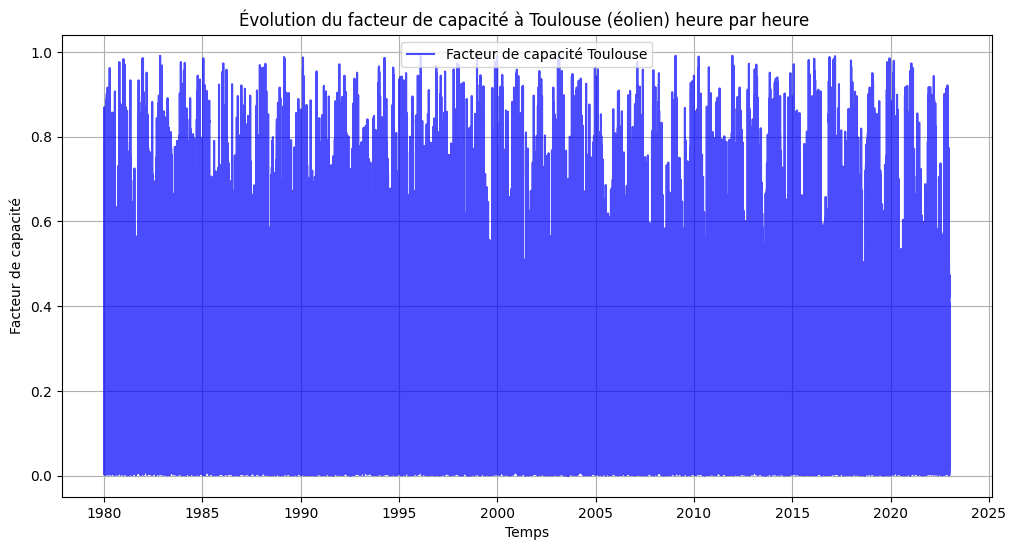

In [4]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_hour_wind['time'], data_hour_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) heure par heure ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()


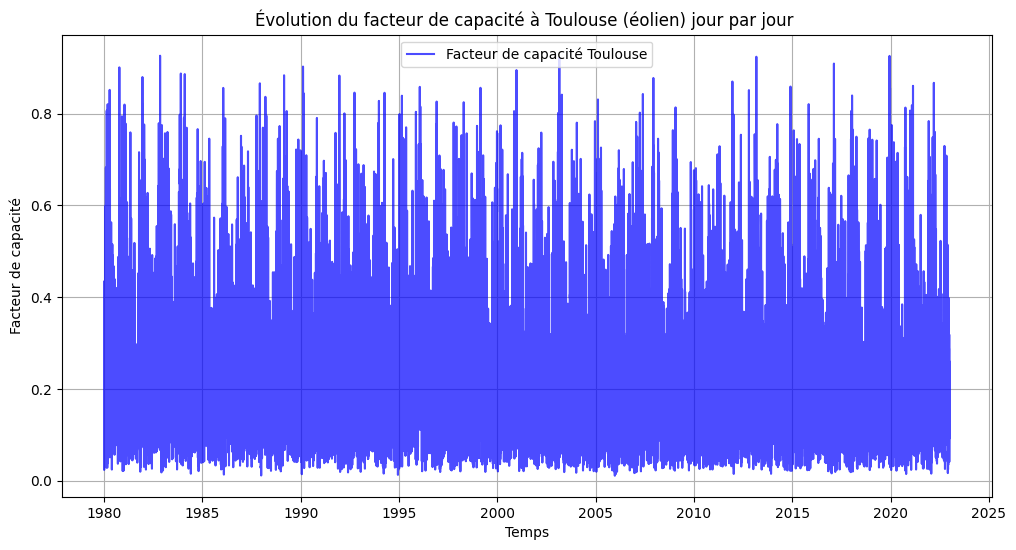

In [5]:
# Création du graphique de série temporelle pour la capacité
plt.figure(figsize=(12, 6))
plt.plot(data_day_wind.index, data_day_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

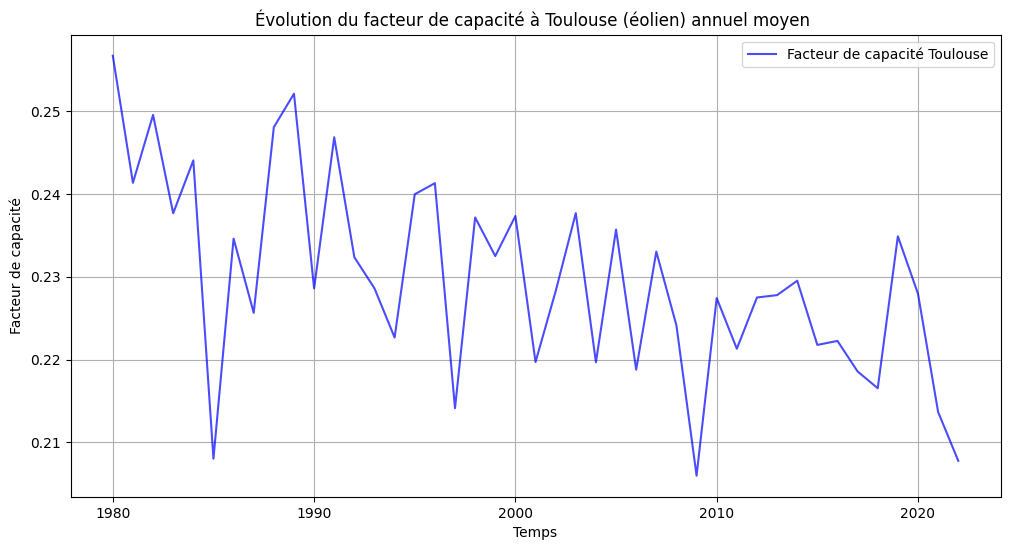

In [6]:
# On commence par regrouper les données par année

data_year_wind = data_hour_wind.groupby(data_hour_wind['time'].dt.year).agg({'electricity': 'mean', 'wind_speed': 'mean'})

# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(data_year_wind.index, data_year_wind['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Évolution du facteur de capacité à Toulouse (éolien) annuel moyen ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

## Etude de tendance et saisonnalité

### Etude de la tendance

On va maintenant étudier la tendance de nos données.

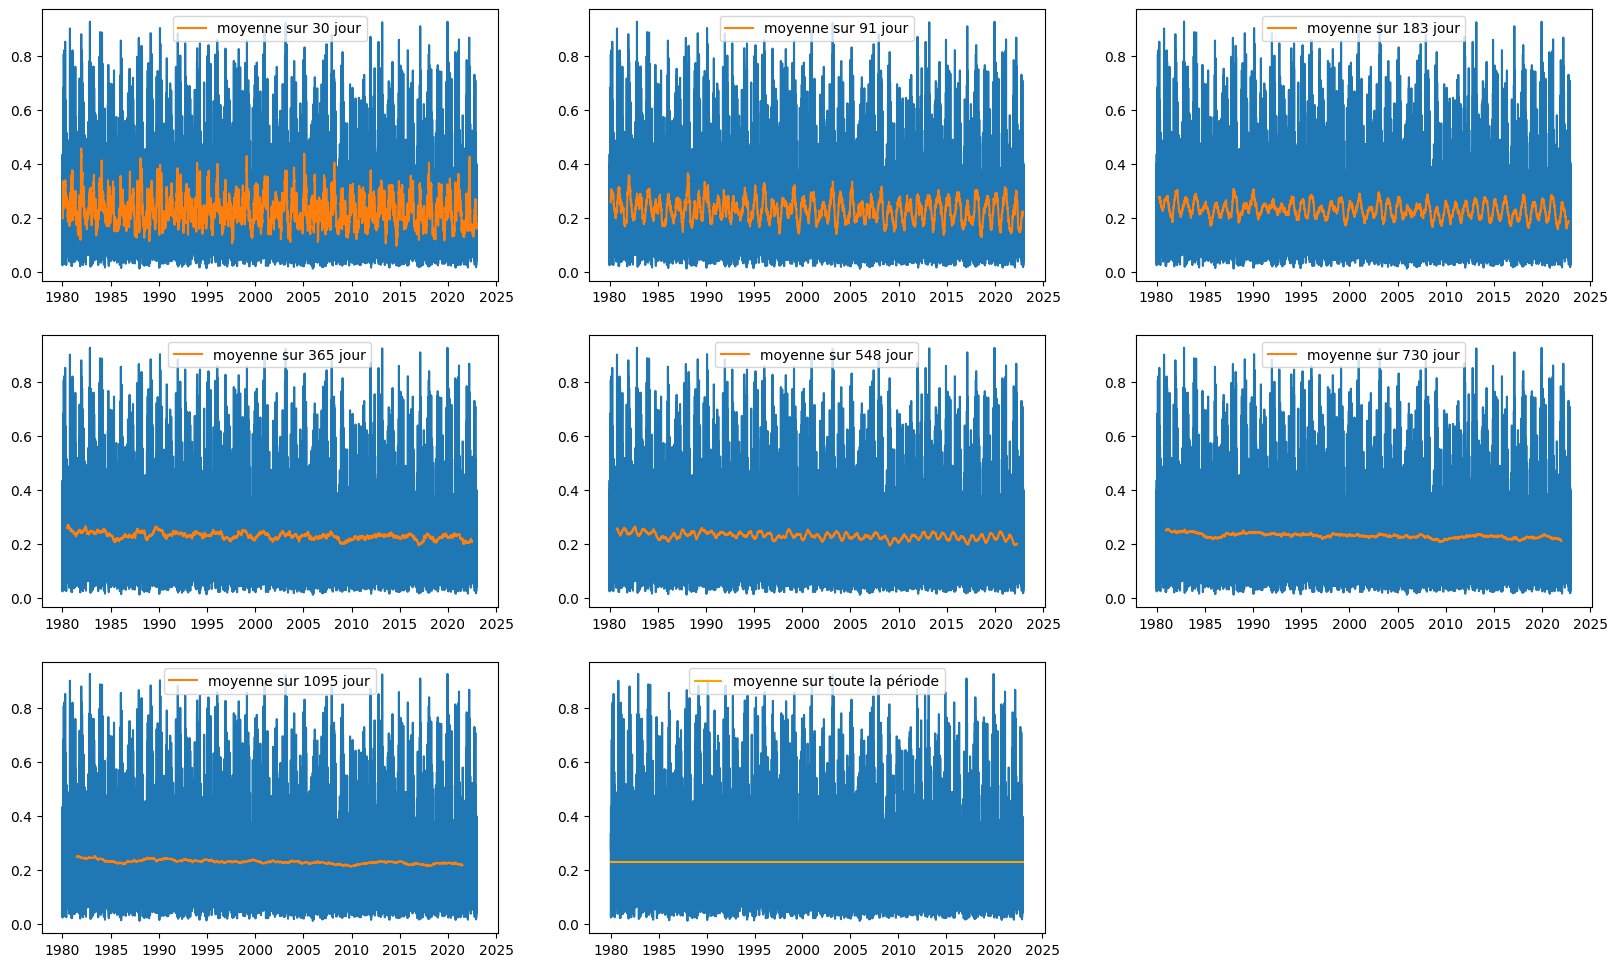

In [7]:
win = [30, 91, 183, 365, 548, 730, 1095] # fenêtre d'observation (en nombre de semaines)
fig = plt.figure(figsize=(20,12))

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(data_day_wind['electricity'])
    ax.plot(data_day_wind['electricity'].rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} jour")
    ax.legend()
    
ax = fig.add_subplot(3, 3, 8)
ax.plot(data_day_wind['electricity'])
ax.hlines(data_day_wind['electricity'].mean(), xmin=3600,xmax=19400,label=f"moyenne sur toute la période",color='orange')
ax.legend()

On observe la tendance sur 1 mois, 3 mois, 6 mois, 1 an, 1 an et demi, 2 ans et 3 ans. On observe que quand la durée de la fenêtre augmente, la tendance approche de plus en plus d'une fonction constante : la tendance du facteur de charge éolien est donc plutôt constant. On observe également une tendance plus linéaire sur des multiples d'un an, ce qui confirme l'intuition qu'on a une saisonnalitée sur 1 an.
Cette analyse est cohérente avec nos intuitions : la tendance du vent n'évolue pas ou très peu au cours du temps.

### Etude de la saisonnalité

On va maintenant étudier la saisonnalité de nos données.

month  day
12     26     0.283665
       27     0.279244
       28     0.293127
       29     0.241680
       30     0.250356
       31     0.219791
1      1      0.247641
       2      0.296374
       3      0.242205
       4      0.246486
       5      0.234464
       6      0.252540
       7      0.231088
       8      0.233096
       9      0.207310
       10     0.231466
       11     0.242706
       12     0.228578
       13     0.263130
       14     0.271376
Name: electricity, dtype: float64
[0.23323865 0.23239784 0.23391071 0.23966611 0.24677865 0.25850069
 0.26240919 0.26298436 0.26489161 0.26139673 0.26214106 0.26235507
 0.26346595]


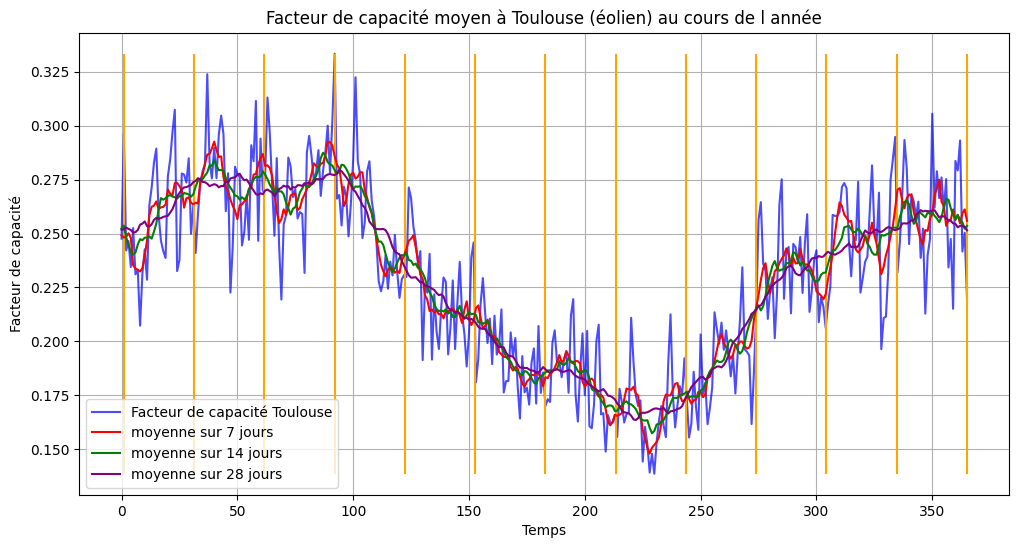

In [8]:
# On commence par regrouper les données par année
data_hour_copy=data_hour_wind.copy()
data_hour_copy['day']=data_hour_copy['time'].dt.day
data_hour_copy['month']=data_hour_copy['time'].dt.month

data_year_wind_tendance = data_hour_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

#print(type(data_year_wind_tendance.index))



# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Facteur de capacité moyen à Toulouse (éolien) au cours de l année')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

time_tick  = np.linspace(1, 365, 13)
plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")

print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

#On ajoute une "moyenne" en lissant
#On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année

plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=f"moyenne sur 7 jours", color = "red")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=f"moyenne sur 14 jours", color = "green")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=f"moyenne sur 28 jours", color = "purple")
plt.legend()

plt.show()

Interprétation : à faire

### Etude avec la fonction "decompose"

On va maintenant étudier les données avec la fonction "decompose". Comment elle marche ?

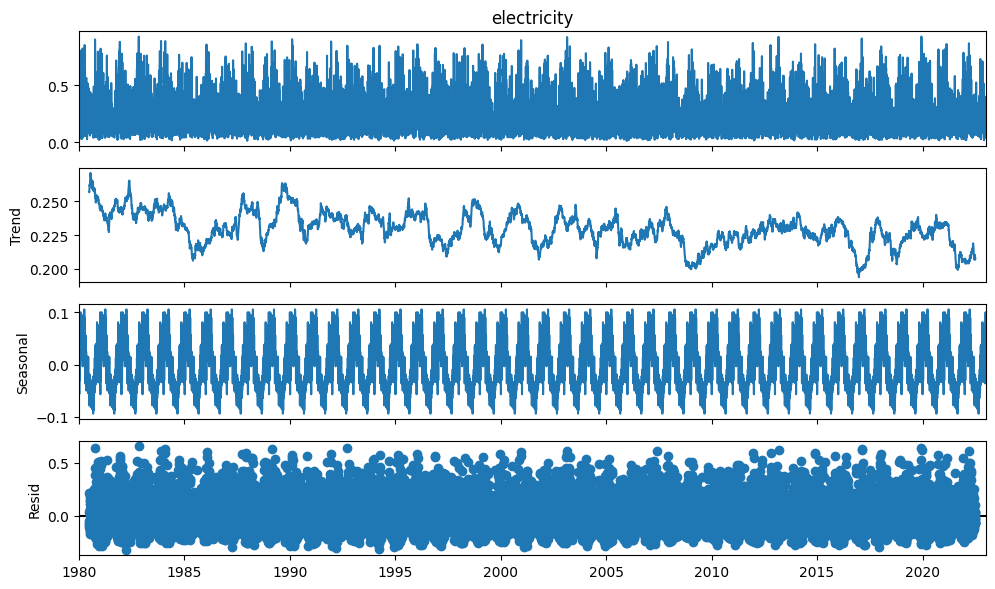

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

decomp = seasonal_decompose(data_day_wind['electricity'], model='additive',period=365)

fig = decomp.plot()
fig.set_size_inches((10, 6))
fig.tight_layout()
plt.show()

## Modèle ARMA

On va mettre en place un modèle ARMA a partir de la moyenne sur les 42 années de données observées. On commence oar étudier si cette série temporelle peut être modélisée par un modèle ARMA : 

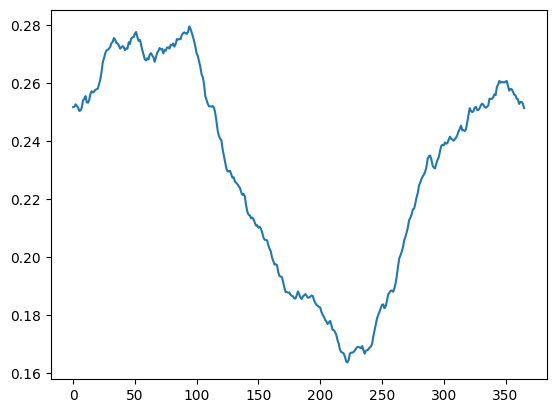

In [10]:
serie = (pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394])
plt.plot(serie)

### Etude de la faisabilité de la modélisation

In [12]:
from statsmodels.tsa.stattools import adfuller

_, p, _, _, _, _ = adfuller(serie)
print("La p-value est de: ", round(p, 3))

La p-value est de:  0.147


Ce bout de code permet de récupérer la p-value du test de Dickey-Fuller de la série. Ce score indique si la série peut être considérée comme stationnaire. En général, s’il est inférieur à 0.05, on la considère stationnaire. Ici, la p-valeur permet d'affirmer que la série est stationnaire. 

### Modélisation ARMA

On passe désormais à la modélisation de la série temporelle, qui va passer par la création d’un modèle ARMA dont il faudra ajuster les paramètres afin de correspondre le mieux possible à la série temporelle concernée.

Ici, les termes p et q correspondent respectivement au premier et au dernier chiffres de l’argument order de la fonction. La méthode fit ajoutée à la fin sert à entraîner le modèle pour qu’il détermine seul ses paramètres. 

La méthode summary permet de vérifier que notre modèle est bon, elle affiche :

In [13]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(serie, order=(1,0,3)).fit()

arma.summary()

c:\Users\Manon Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:                 ARIMA(1, 0, 3)   Log Likelihood                2001.948
Date:                Thu, 07 Mar 2024   AIC                          -3991.897
Time:                        14:16:48   BIC                          -3968.481
Sample:                             0   HQIC                         -3982.592
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2298      0.045      5.144      0.000       0.142       0.317
ar.L1          0.9985      0.003    383.147      0.000       0.993       1.004
ma.L1          0.4921      0.053      9.349      0.000       0.389       0.595
ma.L2          0.2939      0.059      4.946      0.000       0.177       0.410
ma.L3          0.1106      0.053      2.089      0.037       0.007       0.214
sigma2      1.008e-06   7.69e-08     13.119      0.000    8.58e-07    1.16e-06
===================================================================================
Ljung-Box (L1) (Q):                   2.72   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.10   Prob(JB):                         0.82
Heteroskedasticity (H):               0.83   Skew:                            -0.06
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La colonne colonne "coef" correspond aux paramètres du modèle et la colonne "P>|z|" donne la p-value de chacun des paramètres. Ici on voit que les paramètres sont bons car la p-value est toujours inférieure à 0,05. Si ce n’est pas le cas, on peut modifier p et q pour supprimer les paramètres inutiles.

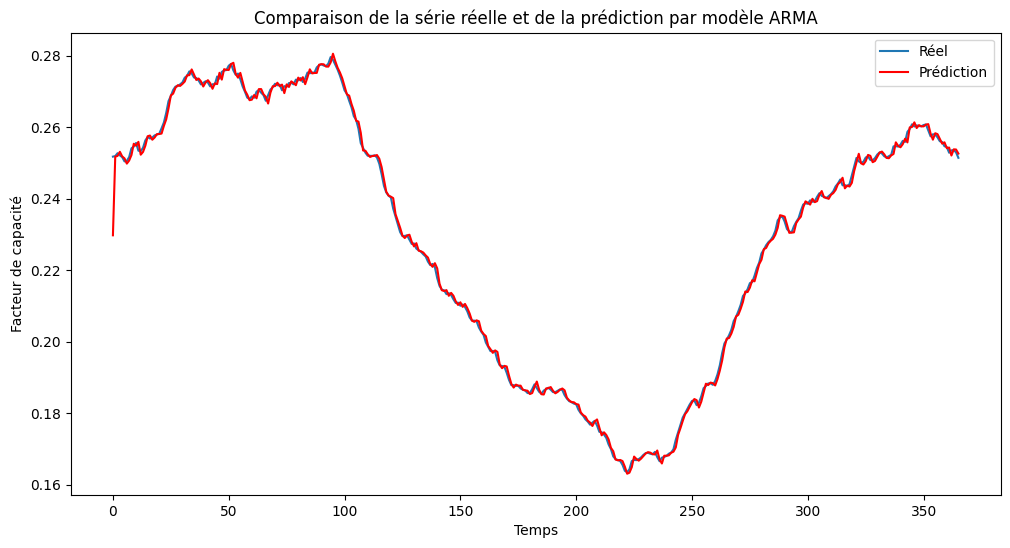

In [22]:
pred = arma.predict()

plt.figure(figsize=(12,6))
plt.plot(serie,label="Réel")
plt.plot(pred, color = "r",label="Prédiction")
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.title("Comparaison de la série réelle et de la prédiction par modèle ARMA")
plt.legend()
plt.show()

On a ainsi en rouge notre modèle et en bleu les valeurs réelles.